#  1 Bologna Airport Performance Analysis

#  2 Introduction

**Bologna Guglielmo Marconi Airport** plays a strategic role within Italy’s air transport infrastructure. This project combines two decades of personal experience in the aviation industry with newly developed data analysis skills to explore operational performance at this key airport.

Using traffic, delay, and environmental data from 2017 to early 2025, this dashboard examines three dimensions of performance:

* Traffic recovery

* Pre-departure ATC delays

* Aviation-related CO₂ emissions

The objective is to deliver a **technically sound**, data-driven view of post-pandemic trends — with a focus on reliability, performance constraints, and operational bottlenecks.



# 3 Dataset Overview

## 3.1 Data Sources and Scope

* Traffic Data (Eurocontrol & Assaeroporti): Monthly IFR movements, passenger, and cargo volumes for 2018–2025.

* ATC Pre-Departure Delay Data (Eurocontrol): Total minutes and counts of delayed departures for Bologna.

* Slot Adherence Reports (Eurocontrol): Breakdown of slot-related disruptions.

* CO₂ Emissions Data (EU/Eurostat/Our World in Data): World and aviation emissions at national level.

* Derived Indicators: Load factor estimates, CO₂ per passenger, normalized delay per 1,000 pax.

Focus is placed on comparative trends: **pre-pandemic vs post-pandemic, high vs low season, and year-over-year operational performance.**


# 4 Methodology

## 4.1 Data Preparation

* Unified column naming for consistency across datasets.

* Removal of non-data rows (Excel headers, footnotes).

* Filtering Bologna-only data (ICAO: LIPE) from Eurocontrol files.

* Handling formatting discrepancies (e.g., decimal marks in CO₂ datasets).


## 4.2 Derived Metrics

* **Delay intensity per 1,000 passengers** used to normalize delay trends relative to traffic.

* Monthly aggregations created to support comparisons over time.

* Passenger and cargo totals used to estimate CO₂ per pax trends.


>**All data processing, transformation, and visualizations were performed using Python (Pandas, Plotly)**. Additional charts were created during the analysis, full code available upon request, hosted separately for clarity.


In [3]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import calendar
import os
import numpy as np

In [4]:
# load the full traffic dataset for 2018
traffic_2018_full = pd.read_csv("airport_traffic_2018.csv")

# filter only Bologna Airport (ICAO code: LIPE)
bologna_traffic_2018 = traffic_2018_full[traffic_2018_full['APT_ICAO'] == 'LIPE']

# optional: reset index
bologna_traffic_2018.reset_index(drop=True, inplace=True)

# save filtered dataset
bologna_traffic_2018.to_csv("bologna_traffic_2018.csv", index=False)

# preview
bologna_traffic_2018.head()


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2
0,2018,1,JAN,2018-01-01,LIPE,Bologna,Italy,65,68,133,65.0,68.0,133.0
1,2018,1,JAN,2018-01-02,LIPE,Bologna,Italy,90,93,183,90.0,92.0,182.0
2,2018,1,JAN,2018-01-03,LIPE,Bologna,Italy,89,89,178,86.0,86.0,172.0
3,2018,1,JAN,2018-01-04,LIPE,Bologna,Italy,96,94,190,93.0,90.0,183.0
4,2018,1,JAN,2018-01-05,LIPE,Bologna,Italy,91,91,182,88.0,86.0,174.0


In [5]:
# load the full traffic dataset for 2019
traffic_2019_full = pd.read_csv("airport_traffic_2019.csv")

# filter only Bologna Airport (ICAO code: LIPE)
bologna_traffic_2019 = traffic_2019_full[traffic_2019_full['APT_ICAO'] == 'LIPE']

# optional: reset index
bologna_traffic_2019.reset_index(drop=True, inplace=True)

# save filtered dataset
bologna_traffic_2019.to_csv("bologna_traffic_2019.csv", index=False)

# preview
bologna_traffic_2019.head()


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2
0,2019,1,JAN,2019-01-01,LIPE,Bologna,Italy,68,71,139,67.0,69.0,136.0
1,2019,1,JAN,2019-01-02,LIPE,Bologna,Italy,95,99,194,91.0,94.0,185.0
2,2019,1,JAN,2019-01-03,LIPE,Bologna,Italy,95,93,188,95.0,92.0,187.0
3,2019,1,JAN,2019-01-04,LIPE,Bologna,Italy,96,93,189,93.0,89.0,182.0
4,2019,1,JAN,2019-01-05,LIPE,Bologna,Italy,82,83,165,82.0,83.0,165.0


In [6]:
# load the full traffic dataset for 2019
traffic_2024_full = pd.read_csv("airport_traffic_2024.csv")

# filter only Bologna Airport (ICAO code: LIPE)
bologna_traffic_2024 = traffic_2024_full[traffic_2024_full['APT_ICAO'] == 'LIPE']

# optional: reset index
bologna_traffic_2024.reset_index(drop=True, inplace=True)

# save filtered dataset
bologna_traffic_2024.to_csv("bologna_traffic_2024.csv", index=False)

# preview
bologna_traffic_2024.head()


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2
0,2024,1,JAN,2024-01-01,LIPE,Bologna,Italy,99,99,198,99.0,97.0,196.0
1,2024,1,JAN,2024-01-02,LIPE,Bologna,Italy,95,94,189,87.0,90.0,177.0
2,2024,1,JAN,2024-01-03,LIPE,Bologna,Italy,99,100,199,98.0,96.0,194.0
3,2024,1,JAN,2024-01-04,LIPE,Bologna,Italy,96,97,193,94.0,95.0,189.0
4,2024,1,JAN,2024-01-05,LIPE,Bologna,Italy,108,108,216,104.0,104.0,208.0


In [7]:
# load the full traffic dataset for 2025 
# N.B.: 2025, being the current year, offers only the first 2 months of data
traffic_2025_full = pd.read_csv("airport_traffic_2025.csv")

# filter only Bologna Airport (ICAO code: LIPE)
bologna_traffic_2025 = traffic_2025_full[traffic_2025_full['APT_ICAO'] == 'LIPE']

# optional: reset index
bologna_traffic_2025.reset_index(drop=True, inplace=True)

# save filtered dataset
bologna_traffic_2025.to_csv("bologna_traffic_2025.csv", index=False)

# preview
bologna_traffic_2025.head()


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2
0,2025,1,JAN,2025-01-01,LIPE,Bologna,Italy,85,87,172,84.0,86.0,170.0
1,2025,1,JAN,2025-01-02,LIPE,Bologna,Italy,104,104,208,102.0,103.0,205.0
2,2025,1,JAN,2025-01-03,LIPE,Bologna,Italy,110,106,216,110.0,104.0,214.0
3,2025,1,JAN,2025-01-04,LIPE,Bologna,Italy,94,97,191,93.0,97.0,190.0
4,2025,1,JAN,2025-01-05,LIPE,Bologna,Italy,101,99,200,99.0,98.0,197.0


In [8]:
# how many rows have nulls in FLT_TOT_1 and in FLT_TOT_IFR_2?
missing_ifr1 = bologna_traffic_2019['FLT_TOT_1'].isna().sum()
missing_ifr2 = bologna_traffic_2019['FLT_TOT_IFR_2'].isna().sum()

total_rows = bologna_traffic_2018.shape[0]
total_rows = bologna_traffic_2019.shape[0]

print(f"Missing values in FLT_TOT_1: {missing_ifr1} out of {total_rows}")
print(f"Missing values in FLT_TOT_IFR_2: {missing_ifr2} out of {total_rows}")

Missing values in FLT_TOT_1: 0 out of 365
Missing values in FLT_TOT_IFR_2: 92 out of 365


## 4.3 Choosing the Reference Column for IFR Movements

The original Eurocontrol dataset includes two versions of IFR movement totals:

- `FLT_TOT_1`: Provided by the Network Manager (Eurocontrol), includes IFR arrivals + departures.
- `FLT_TOT_IFR_2`: Provided by individual airport operators, but often incomplete or missing.

Upon checking the 2019 data for Bologna, we found that `FLT_TOT_IFR_2` is missing in 92 out of 365 rows (approximately 25%). For this reason, we chose to rely exclusively on `FLT_TOT_1` for total IFR movements, as it is more complete and consistent across years.

We also renamed the columns for clarity:

- `FLT_DEP_1` → `Departures_IFR`  
- `FLT_ARR_1` → `Arrivals_IFR`  
- `FLT_TOT_1` → `Total_IFR_Movements`


In [9]:
# keep only relevant columns and rename for clarity
bologna_traffic_2018_clean = bologna_traffic_2018[[
    'YEAR', 'MONTH_NUM', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
    'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1'
]].rename(columns={
    'FLT_DEP_1': 'Departures_IFR',
    'FLT_ARR_1': 'Arrivals_IFR',
    'FLT_TOT_1': 'Total_IFR_Movements'
})

# save cleaned version
bologna_traffic_2018_clean.to_csv("bologna_traffic_2018_clean.csv", index=False)

# preview
bologna_traffic_2018_clean.head()


,YEAR,MONTH_NUM,FLT_DATE,APT_ICAO,APT_NAME,Departures_IFR,Arrivals_IFR,Total_IFR_Movements
0,2018,1,2018-01-01,LIPE,Bologna,65,68,133
1,2018,1,2018-01-02,LIPE,Bologna,90,93,183
2,2018,1,2018-01-03,LIPE,Bologna,89,89,178
3,2018,1,2018-01-04,LIPE,Bologna,96,94,190
4,2018,1,2018-01-05,LIPE,Bologna,91,91,182


In [10]:
# keep only relevant columns and rename for clarity
bologna_traffic_2019_clean = bologna_traffic_2019[[
    'YEAR', 'MONTH_NUM', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
    'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1'
]].rename(columns={
    'FLT_DEP_1': 'Departures_IFR',
    'FLT_ARR_1': 'Arrivals_IFR',
    'FLT_TOT_1': 'Total_IFR_Movements'
})

# save cleaned version
bologna_traffic_2019_clean.to_csv("bologna_traffic_2019_clean.csv", index=False)

# preview
bologna_traffic_2019_clean.head()


,YEAR,MONTH_NUM,FLT_DATE,APT_ICAO,APT_NAME,Departures_IFR,Arrivals_IFR,Total_IFR_Movements
0,2019,1,2019-01-01,LIPE,Bologna,68,71,139
1,2019,1,2019-01-02,LIPE,Bologna,95,99,194
2,2019,1,2019-01-03,LIPE,Bologna,95,93,188
3,2019,1,2019-01-04,LIPE,Bologna,96,93,189
4,2019,1,2019-01-05,LIPE,Bologna,82,83,165


In [11]:
# keep only relevant columns and rename for clarity
bologna_traffic_2024_clean = bologna_traffic_2024[[
    'YEAR', 'MONTH_NUM', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
    'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1'
]].rename(columns={
    'FLT_DEP_1': 'Departures_IFR',
    'FLT_ARR_1': 'Arrivals_IFR',
    'FLT_TOT_1': 'Total_IFR_Movements'
})

# save cleaned version
bologna_traffic_2024_clean.to_csv("bologna_traffic_2024_clean.csv", index=False)

# preview
bologna_traffic_2024_clean.head()


,YEAR,MONTH_NUM,FLT_DATE,APT_ICAO,APT_NAME,Departures_IFR,Arrivals_IFR,Total_IFR_Movements
0,2024,1,2024-01-01,LIPE,Bologna,99,99,198
1,2024,1,2024-01-02,LIPE,Bologna,95,94,189
2,2024,1,2024-01-03,LIPE,Bologna,99,100,199
3,2024,1,2024-01-04,LIPE,Bologna,96,97,193
4,2024,1,2024-01-05,LIPE,Bologna,108,108,216


In [12]:
# keep only relevant columns and rename for clarity
bologna_traffic_2025_clean = bologna_traffic_2025[[
    'YEAR', 'MONTH_NUM', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
    'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1'
]].rename(columns={
    'FLT_DEP_1': 'Departures_IFR',
    'FLT_ARR_1': 'Arrivals_IFR',
    'FLT_TOT_1': 'Total_IFR_Movements'
})

# save cleaned version
bologna_traffic_2025_clean.to_csv("bologna_traffic_2025_clean.csv", index=False)

# preview
bologna_traffic_2025_clean.head()


,YEAR,MONTH_NUM,FLT_DATE,APT_ICAO,APT_NAME,Departures_IFR,Arrivals_IFR,Total_IFR_Movements
0,2025,1,2025-01-01,LIPE,Bologna,85,87,172
1,2025,1,2025-01-02,LIPE,Bologna,104,104,208
2,2025,1,2025-01-03,LIPE,Bologna,110,106,216
3,2025,1,2025-01-04,LIPE,Bologna,94,97,191
4,2025,1,2025-01-05,LIPE,Bologna,101,99,200


## 4.4 Summary of Cleaned Traffic Datasets

To enable focused analysis on Bologna Airport, the original Eurocontrol datasets were filtered and cleaned. The resulting files include only IFR arrivals, departures, and total movements, based on the `FLT_TOT_1` column from the Network Manager.

| File Name                    | Year  | Source            | Content                       | Notes                            |
|-----------------------------|-------|--------------------|-------------------------------|----------------------------------|
| bologna_traffic_2018_clean.csv | 2018 | Eurocontrol (NM)   | IFR traffic movements         | APT_ICAO = LIPE filtered         |
| bologna_traffic_2019_clean.csv | 2019 | Eurocontrol (NM)   | Same                          | `FLT_TOT_IFR_2` excluded         |
| bologna_traffic_2024_clean.csv | 2024 | Eurocontrol (NM)   | Same                          | Full year                        |
| bologna_traffic_2025_clean.csv | 2025 | Eurocontrol (NM)   | Same                          | Includes January and February    |


#  5 Traffic Recovery Trajectory (2018–2025)

In [13]:
# load the clean datasets
traffic_2018 = pd.read_csv("bologna_traffic_2018_clean.csv")
traffic_2019 = pd.read_csv("bologna_traffic_2019_clean.csv")
traffic_2024 = pd.read_csv("bologna_traffic_2024_clean.csv")
traffic_2025 = pd.read_csv("bologna_traffic_2025_clean.csv")

# unify in one
bologna_traffic_all = pd.concat([traffic_2018, traffic_2019, traffic_2024, traffic_2025], ignore_index=True)


In [14]:
# groupby year by year
monthly_traffic = bologna_traffic_all.groupby(['YEAR', 'MONTH_NUM'], as_index=False)['Total_IFR_Movements'].sum()

# pivot to obtain months in rows ans year in columns
pivot_traffic = monthly_traffic.pivot(index='MONTH_NUM', columns='YEAR', values='Total_IFR_Movements')
pivot_traffic = pivot_traffic.sort_index()


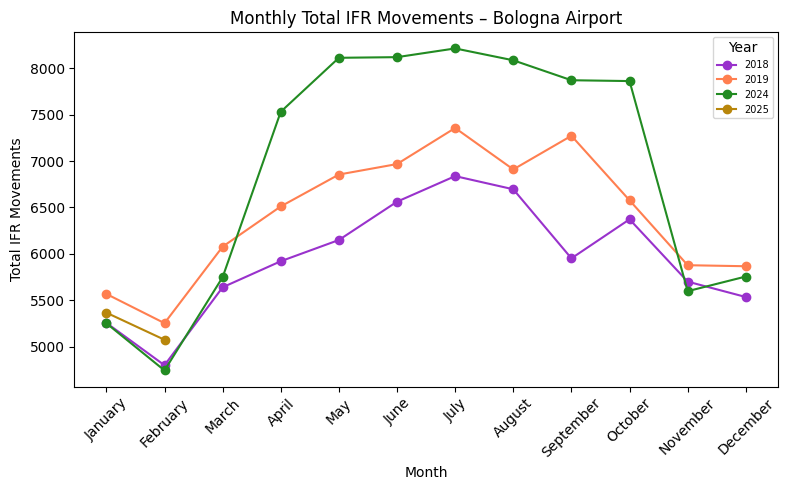

In [15]:
# name of months
month_names = [calendar.month_name[i] for i in range(1, 13)]

# personalized colors
custom_colors = ['darkorchid', 'coral', 'forestgreen', 'darkgoldenrod']

# plot
plt.figure(figsize=(8,5))
pivot_traffic.plot(
    marker='o',
    ax=plt.gca(),
    color=custom_colors,
)

plt.title('Monthly Total IFR Movements – Bologna Airport')
plt.xlabel('Month')
plt.ylabel('Total IFR Movements')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title="Year", loc='upper right', fontsize=7)
plt.tight_layout()
plt.grid(False)
plt.show()



Note: This visualization summarizes trends over time.

>The traffic timeline shows a **clear recovery pattern following COVID-19 disruption**. From mid-2024 onwards, IFR departures at Bologna Airport exceed 2019 benchmarks. Notably, the April–October 2024 period shows consistent stability, suggesting regained market confidence and operational resilience.

Each line represents a different year, helping to visualize trends and seasonal differences — such as peaks during summer or changes in activity levels before and after the COVID-19 pandemic.

Initial months of 2025 (January–February) continue the trend, pointing toward sustained post-pandemic recovery.

# 6 Cleaning and Consolidating ATC Pre-Departure Delays

The original dataset includes delay data from multiple sources:

- `DLY_ATC_PRE_2`: Delays reported by airport operators (APT)
- `DLY_ATC_PRE_3`: Delays reported by airlines via CODA (more complete)

For this analysis, `DLY_ATC_PRE_3` was used as the primary source due to its broader coverage.  
In cases where it was missing, values from `DLY_ATC_PRE_2` were used as a fallback.

The number of IFR departures (`FLT_DEP_1`, from Eurocontrol NM) was retained to provide context to the total delays.


In [16]:
# load delay data 2018
delay_2018 = pd.read_csv("atc_pre_departure_delays_2018.csv")

# filter for Bologna
bologna_delay_2018 = delay_2018[delay_2018['APT_ICAO'] == 'LIPE'].copy()

# create unified columns
bologna_delay_2018['IFR_Departures'] = bologna_delay_2018['FLT_DEP_1']

# use DLY_ATC_PRE_3 as main value
bologna_delay_2018['ATC_Pre_Delay_Min'] = bologna_delay_2018['DLY_ATC_PRE_3']

# fill missing with DLY_ATC_PRE_2
bologna_delay_2018['ATC_Pre_Delay_Min'].fillna(
    bologna_delay_2018['DLY_ATC_PRE_2'], inplace=True
)

# keep only useful columns
bologna_delay_2018_clean = bologna_delay_2018[[
    'YEAR', 'MONTH_NUM', 'FLT_DATE',
    'APT_ICAO', 'APT_NAME',
    'IFR_Departures', 'ATC_Pre_Delay_Min'
]]

# save cleaned version
bologna_delay_2018_clean.to_csv("bologna_atc_delay_summary_2018.csv", index=False)


In [17]:
# load delay data 2019
delay_2019 = pd.read_csv("atc_pre_departure_delays_2019.csv")

# filter for Bologna
bologna_delay_2019 = delay_2019[delay_2019['APT_ICAO'] == 'LIPE'].copy()

# create unified columns
bologna_delay_2019['IFR_Departures'] = bologna_delay_2019['FLT_DEP_1']

# use DLY_ATC_PRE_3 as main value
bologna_delay_2019['ATC_Pre_Delay_Min'] = bologna_delay_2019['DLY_ATC_PRE_3']

# fill missing with DLY_ATC_PRE_2
bologna_delay_2019['ATC_Pre_Delay_Min'].fillna(
    bologna_delay_2019['DLY_ATC_PRE_2'], inplace=True
)

# keep only useful columns
bologna_delay_2019_clean = bologna_delay_2019[[
    'YEAR', 'MONTH_NUM', 'FLT_DATE',
    'APT_ICAO', 'APT_NAME',
    'IFR_Departures', 'ATC_Pre_Delay_Min'
]]

# save cleaned version
bologna_delay_2019_clean.to_csv("bologna_atc_delay_summary_2019.csv", index=False)


In [18]:
# load delay data 2024
delay_2024 = pd.read_csv("atc_pre_departure_delays_2024.csv")

# filter for Bologna
bologna_delay_2024 = delay_2024[delay_2024['APT_ICAO'] == 'LIPE'].copy()

# create unified columns
bologna_delay_2024['IFR_Departures'] = bologna_delay_2024['FLT_DEP_1']

# use DLY_ATC_PRE_3 as main value
bologna_delay_2024['ATC_Pre_Delay_Min'] = bologna_delay_2024['DLY_ATC_PRE_3']

# fill missing with DLY_ATC_PRE_2
bologna_delay_2024['ATC_Pre_Delay_Min'].fillna(
    bologna_delay_2024['DLY_ATC_PRE_2'], inplace=True
)

# keep only useful columns
bologna_delay_2024_clean = bologna_delay_2024[[
    'YEAR', 'MONTH_NUM', 'FLT_DATE',
    'APT_ICAO', 'APT_NAME',
    'IFR_Departures', 'ATC_Pre_Delay_Min'
]]

# save cleaned version
bologna_delay_2024_clean.to_csv("bologna_atc_delay_summary_2024.csv", index=False)

In [19]:
# load delay data 2025
delay_2025 = pd.read_csv("atc_pre_departure_delays_2025.csv")

# filter for Bologna
bologna_delay_2025 = delay_2025[delay_2025['APT_ICAO'] == 'LIPE'].copy()

# create unified columns
bologna_delay_2025['IFR_Departures'] = bologna_delay_2025['FLT_DEP_1']

# use DLY_ATC_PRE_3 as main value
bologna_delay_2025['ATC_Pre_Delay_Min'] = bologna_delay_2025['DLY_ATC_PRE_3']

# fill missing with DLY_ATC_PRE_2
bologna_delay_2025['ATC_Pre_Delay_Min'].fillna(
    bologna_delay_2025['DLY_ATC_PRE_2'], inplace=True
)

# keep only useful columns
bologna_delay_2025_clean = bologna_delay_2025[[
    'YEAR', 'MONTH_NUM', 'FLT_DATE',
    'APT_ICAO', 'APT_NAME',
    'IFR_Departures', 'ATC_Pre_Delay_Min'
]]

# save cleaned version
bologna_delay_2025_clean.to_csv("bologna_atc_delay_summary_2025.csv", index=False)


# load cleaned datasets
delay_2018 = pd.read_csv("bologna_atc_delay_summary_2018.csv")
delay_2019 = pd.read_csv("bologna_atc_delay_summary_2019.csv")
delay_2024 = pd.read_csv("bologna_atc_delay_summary_2024.csv")
delay_2025 = pd.read_csv("bologna_atc_delay_summary_2025.csv")

# concatenate into a single dataframe
bologna_atc_delays_all_years = pd.concat(
    [delay_2018, delay_2019, delay_2024, delay_2025],
    ignore_index=True
)

# check structure
bologna_atc_delays_all_years.head()


,YEAR,MONTH_NUM,FLT_DATE,APT_ICAO,APT_NAME,IFR_Departures,ATC_Pre_Delay_Min
0,2018,1,2018-01-01,LIPE,Bologna,65,115.0
1,2018,1,2018-01-02,LIPE,Bologna,90,37.0
2,2018,1,2018-01-03,LIPE,Bologna,89,77.0
3,2018,1,2018-01-04,LIPE,Bologna,96,34.0
4,2018,1,2018-01-05,LIPE,Bologna,91,26.0


## 6.1 Summary of Cleaned ATC Pre-Departure Delay Datasets

ATC pre-departure delay data was extracted for Bologna Airport from Eurocontrol's yearly reports.  
To ensure the most complete picture, the dataset prioritizes delays reported by airlines via CODA (`DLY_ATC_PRE_3`), with airport-reported values (`DLY_ATC_PRE_2`) used as a fallback where needed.

| File Name                          | Year  | Source(s)             | Content                                | Notes                                         |
|-----------------------------------|-------|------------------------|----------------------------------------|-----------------------------------------------|
| bologna_atc_delay_summary_2018.csv | 2018 | NM + CODA / APT        | IFR departures and ATC delays (minutes)| CODA used as main, APT as fallback            |
| bologna_atc_delay_summary_2019.csv | 2019 | NM + CODA / APT        | Same                                   | Ready for seasonal comparison (e.g. July–Aug) |
| bologna_atc_delay_summary_2024.csv | 2024 | NM + CODA / APT        | Same                                   | Full-year data                                |
| bologna_atc_delay_summary_2025.csv | 2025 | NM + CODA / APT        | Same                                   | Jan–Feb data only                             |


## 6.2 Merging ATC Pre-Departure Delay Data (2018–2025)

To enable cross-year comparisons and time series visualizations, the cleaned delay datasets were merged into a single dataframe. This combined table includes all available months from 2018, 2019, 2024, and early 2025.

This unified view allows us to observe long-term trends and seasonal patterns (e.g. summer congestion) more effectively.


In [20]:
# load cleaned datasets
delay_2018 = pd.read_csv("bologna_atc_delay_summary_2018.csv")
delay_2019 = pd.read_csv("bologna_atc_delay_summary_2019.csv")
delay_2024 = pd.read_csv("bologna_atc_delay_summary_2024.csv")
delay_2025 = pd.read_csv("bologna_atc_delay_summary_2025.csv")

# concatenate into a single dataframe
bologna_atc_delays_all_years = pd.concat(
    [delay_2018, delay_2019, delay_2024, delay_2025],
    ignore_index=True
)

# check structure
bologna_atc_delays_all_years.head()

# save the file
bologna_atc_delays_all_years.to_csv("bologna_atc_delays_all_years.csv", index=False)


In [21]:
# group by month and year
monthly_by_year_with_delay = bologna_atc_delays_all_years.groupby(['YEAR', 'MONTH_NUM'], as_index=False)['IFR_Departures'].sum()


In [22]:
# pivot the tabel: transfor to have months in row and years in columns (for the plot)
pivot_df = monthly_by_year_with_delay.pivot(index='MONTH_NUM', columns='YEAR', values='IFR_Departures')

# organize months from 1 to 12 (just for security)
pivot_df = pivot_df.sort_index()


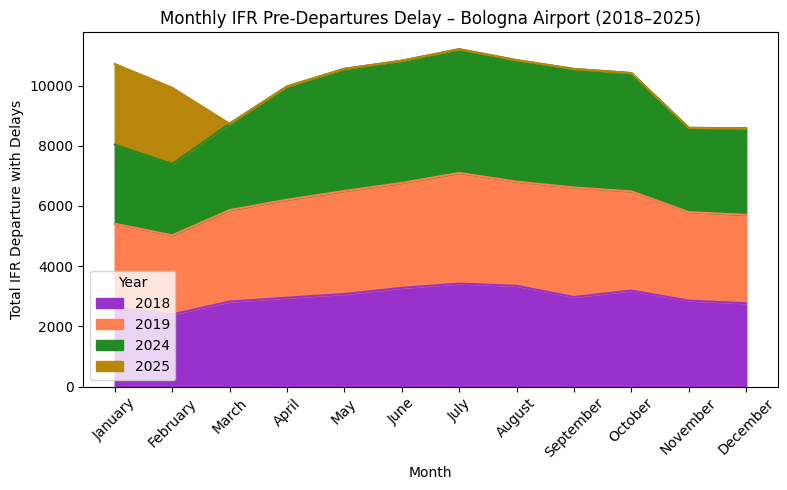

In [23]:
# list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# area plot
pivot_df.plot(kind= 'area',
            figsize=(8,5),
            color= ['darkorchid', 'coral', 'forestgreen', 'darkgoldenrod'] )

# labels
plt.title('Monthly IFR Pre-Departures Delay – Bologna Airport (2018–2025)')
plt.xlabel('Month')
plt.ylabel('Total IFR Departure with Delays')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.grid(False)
plt.legend(title="Year", loc='lower left', fontsize=10)
plt.tight_layout()
plt.show()


Note: This area chart only represents flights that experienced an ATC pre-departure delay — not the total IFR traffic.


## 6.3  Escalating Trend in ATC Delayed Departures (2018–2025)

This area chart visualizes the **absolute growth** in delayed IFR departures. The trend is clear: 2025 (even with only Q1 data) has already surpassed historical norms for January–March.

This intensification points to:

* Accumulating structural strain,

* Potentially static ATC or apron resources despite traffic recovery,

* Seasonal challenges not yet addressed by systemic fixes.



In [24]:
# loading the file with every atc_delay
delay_df = pd.read_csv("bologna_atc_delays_all_years.csv")

# group by mont and year: add flights and delays
monthly_delay_summary = delay_df.groupby(['YEAR', 'MONTH_NUM'], as_index=False).agg({
    'IFR_Departures': 'sum',
    'ATC_Pre_Delay_Min': 'sum'
})


In [25]:
# look for nulls
delay_df['ATC_Pre_Delay_Min'].isna().sum()

# how many equal to 0?
(delay_df['ATC_Pre_Delay_Min'] == 0).sum()


8

In [26]:
# avoiding null values
monthly_delay_summary = delay_df.groupby(['YEAR', 'MONTH_NUM'], as_index=False).agg({
    'IFR_Departures': 'sum',
    'ATC_Pre_Delay_Min': 'sum'  # it must be 'sum', not 'first' or other!
})


In [27]:
# re-check
delay_df['ATC_Pre_Delay_Min'] = delay_df['ATC_Pre_Delay_Min'].fillna(0)


The visualizations below were generated using Plotly. Code is available upon request and can be shared via GitHub if needed. Individual charts are not included here to maintain focus and visual clarity.

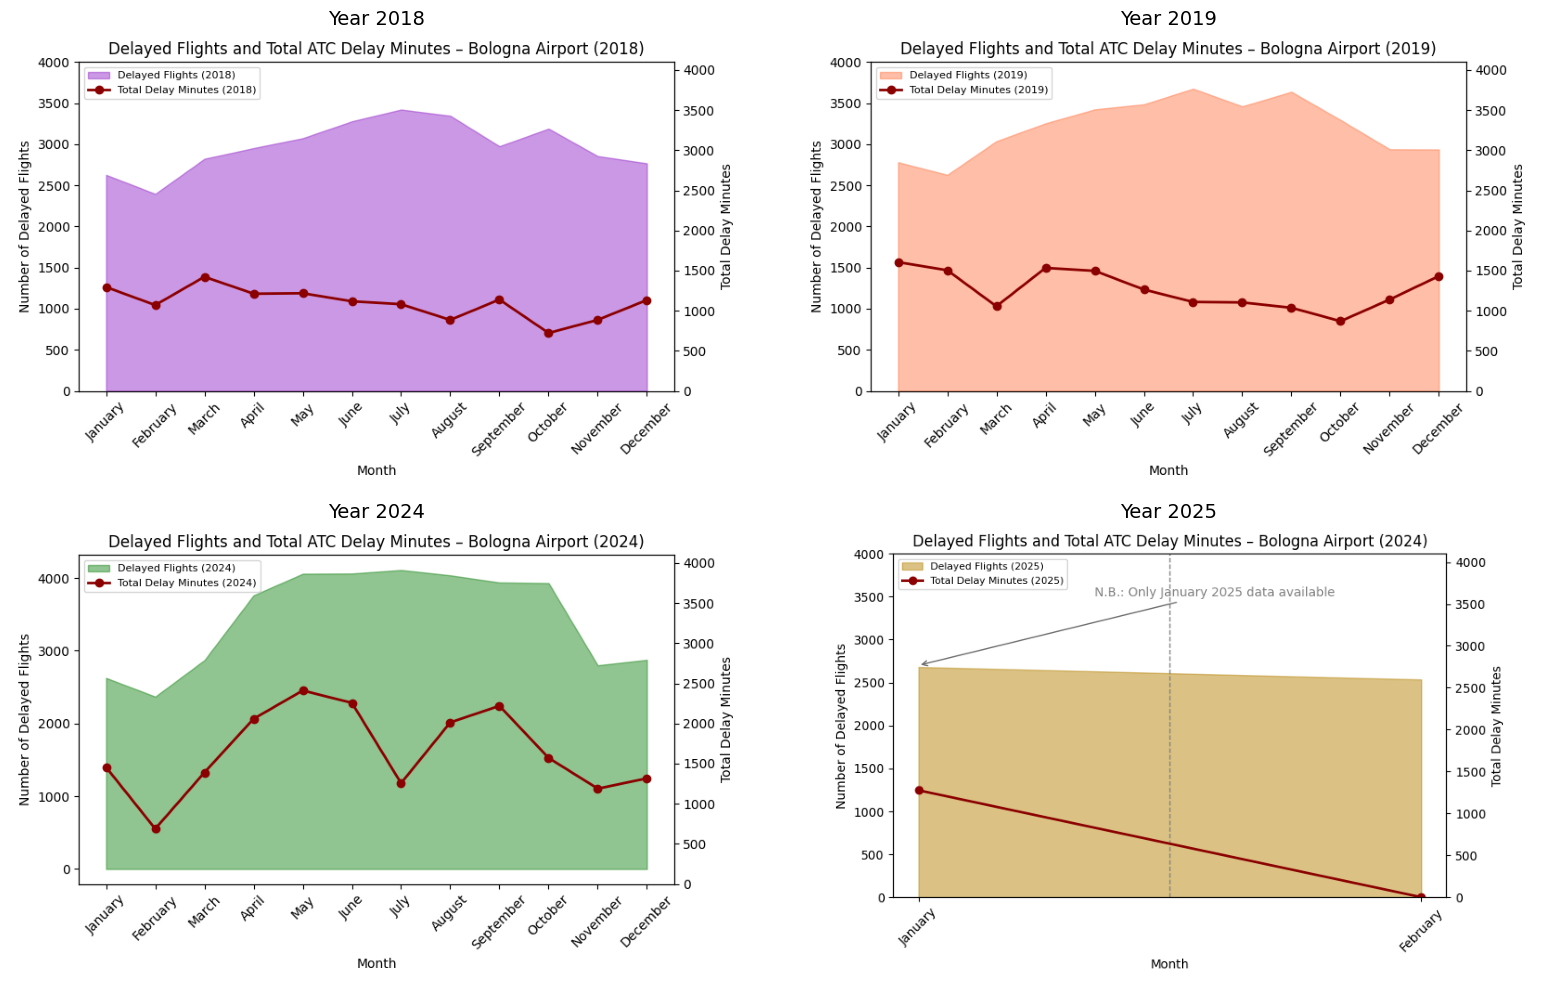

In [28]:
# load previous graphs(area plot + line plot for total delays, one per year)
image_paths = [
    "grafico_2018.png",
    "grafico_2019.png",
    "grafico_2024.png",
    "grafico_2025.png"
]

# titles over e/sublplot
titles = ["2018", "2019", "2024", "2025"]

# create figure and underplot (4x4)
fig, axes = plt.subplots(2, 2, figsize=(16,10))

for i, ax in enumerate(axes.flat):
    img = mpimg.imread(image_paths[i])
    ax.imshow(img)
    ax.set_title(f"Year {titles[i]}", fontsize=14)
    ax.axis('off') # No axis

plt.tight_layout()
plt.grid(False)

# save figure
plt.savefig("pre_departure_delays", bbox_inches='tight', dpi=150)

plt.show()


## 6.4 Year-over-Year Delay Dynamics

The four-panel chart decomposes ATC delay metrics by year. While 2018–2019 were relatively stable, 2024 reflects a **structural break**, with higher total delays and more affected flights — especially in Q2 and Q3.

By **January 2025**, the new year opens with **record-high delays**, further validating the concern that **current infrastructure may not be absorbing demand increases efficiently**.

In [29]:
# create a list for the year
years = [2018, 2019, 2024, 2025]
all_averages = []

for year in years:
    # load the data
    df_delay = pd.read_csv(f"bologna_atc_delay_summary_{year}.csv")
    df_traffic = pd.read_csv(f"bologna_traffic_{year}_clean.csv")

    # group delay data by month
    delays = df_delay.groupby(['YEAR', 'MONTH_NUM'], as_index=False).agg({
        'IFR_Departures': 'sum',
        'ATC_Pre_Delay_Min': 'sum'
    })
    delays.rename(columns={
        'IFR_Departures': 'Flights_with_delay',
        'ATC_Pre_Delay_Min': 'Minutes_of_delay'
    }, inplace=True)

    # group traffic data by month
    total_flights = df_traffic.groupby(['YEAR', 'MONTH_NUM'], as_index=False).agg({
        'Total_IFR_Movements': 'sum'
    })

    # merge both tables
    df = pd.merge(delays, total_flights, on=['YEAR', 'MONTH_NUM'])

    # calculate average delays
    df['Avg_delay_per_delayed_flight'] = df['Minutes_of_delay'] / df['Flights_with_delay']
    df['Avg_delay_per_total_flight'] = df['Minutes_of_delay'] / df['Total_IFR_Movements']

    # append to final list
    all_averages.append(df)



In [30]:
# combine all the years
df_all = pd.concat(all_averages, ignore_index=True)

# save to .csv
df_all.to_csv("bologna_monthly_delay_averages.csv", index=False)


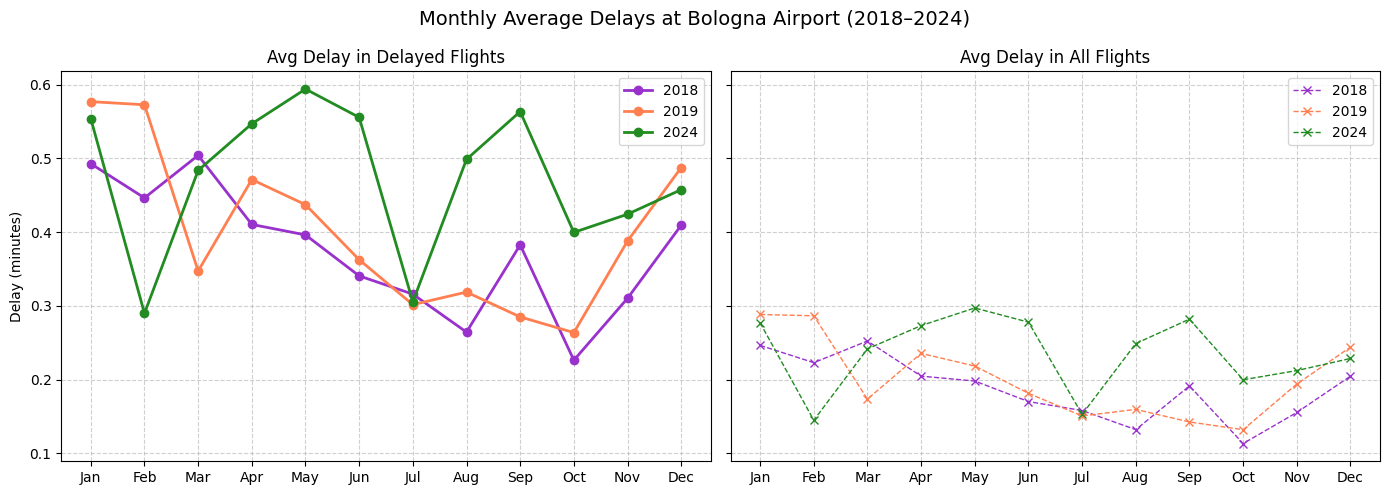

In [31]:
# Re-load the dataset
df_all = pd.read_csv("bologna_monthly_delay_averages.csv")

# Define years and colors
years = [2018, 2019, 2024]
custom_colors = ['darkorchid', 'coral', 'forestgreen']

# Plot side-by-side charts with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot 1: Avg delay per delayed flight
for year, color in zip(years, custom_colors):
    df_year = df_all[df_all['YEAR'] == year]
    axs[0].plot(df_year['MONTH_NUM'], df_year['Avg_delay_per_delayed_flight'],
                label=str(year), marker='o', linewidth=2, color=color)
axs[0].set_title('Avg Delay in Delayed Flights', fontsize=12)
axs[0].set_ylabel('Delay (minutes)')
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Avg delay per total flight
for year, color in zip(years, custom_colors):
    df_year = df_all[df_all['YEAR'] == year]
    axs[1].plot(df_year['MONTH_NUM'], df_year['Avg_delay_per_total_flight'],
                label=str(year), marker='x', linestyle='--', linewidth=1, color=color)
axs[1].set_title('Avg Delay in All Flights', fontsize=12)
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

# Global title and layout
plt.suptitle("Monthly Average Delays at Bologna Airport (2018–2024)", fontsize=14)
plt.tight_layout()
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 6.5 Evolving Patterns in Delay Distribution

This chart explores how **average delay per total flight** and **average delay per delayed flight** evolved between 2018 and 2025. While previous years showed concentrated delay events, 2024 introduced a shift: delays became **more widespread**, impacting a larger portion of total traffic.

This divergence suggests:

* Systemic strain (not just outlier events),

* Underlying capacity limits,

 *Potential mismatch between traffic growth and infrastructure scalability.

The relative improvement in 2025 merits attention and is addressed in more detail below.



# 7 High Season - Summer Time

In [32]:
# Read files
# define a dictionary to read the files - italian aerports
file_paths = {
    2018: '2018_total_pax_e_cargo_italia.xlsx',
    2019: '2019_total_pax_e_cargo_italia.xlsx',
    2024: '2024_total_pax_e_cargo_italia.xlsx',
    2025: ['2025_01.xlsx', '2025_02.xlsx']  # Lista di file per il 2025
}

# create an empty list to place the result
results = []


In [33]:
# find headers to know column names
df = pd.read_excel("2019_total_pax_e_cargo_italia.xlsx", header=1)
print(df.columns.tolist())


['N.', 'Aeroporto', 'Movimenti', '%', 'Passeggeri', '%.1', 'Cargo (Tons)', '%.2']


In [34]:
# compute national averages
national_avg = df[['Passeggeri', 'Cargo (Tons)']].mean()

In [35]:
# define a function to read an Excel file, extract Bologna's data and calculate the national mean
def extract_bologna_and_national_avg(file, year):
    # Read the file (headers start from row 2, index 1)
    df = pd.read_excel(file, header=1)
    df = df.rename(columns=str.strip)  # Strip whitespace from column names

    # extract Bologna's data
    bologna_data = df[df['Aeroporto'].str.contains('Bologna', case=False, na=False)]

    return {
        'Year': year,
        'Bologna_Movements': bologna_data['Movimenti'].values[0] if not bologna_data.empty else None,
        'Bologna_Passengers': bologna_data['Passeggeri'].values[0] if not bologna_data.empty else None,
        'Bologna_Cargo_Tons': bologna_data['Cargo (Tons)'].values[0] if not bologna_data.empty else None,
        'National_Avg_Passengers': national_avg['Passeggeri'],
        'National_Avg_Cargo_Tons': national_avg['Cargo (Tons)']
    }


In [36]:
# apply the function to every year on the list
for year, paths in file_paths.items():
    if isinstance(paths, list):
        # for 2025, january and february
        combined = {
            'Year': year,
            'Bologna_Movements': 0,
            'Bologna_Passengers': 0,
            'Bologna_Cargo_Tons': 0,
            'National_Avg_Passengers': 0,
            'National_Avg_Cargo_Tons': 0
        }
        for file in paths:
            data = extract_bologna_and_national_avg(file, year)
            combined['Bologna_Movements'] += data['Bologna_Movements'] or 0
            combined['Bologna_Passengers'] += data['Bologna_Passengers'] or 0
            combined['Bologna_Cargo_Tons'] += data['Bologna_Cargo_Tons'] or 0
            combined['National_Avg_Passengers'] += data['National_Avg_Passengers']
            combined['National_Avg_Cargo_Tons'] += data['National_Avg_Cargo_Tons']
        
        # national average for 2025 (for 2025 will be just for two months)
        combined['National_Avg_Passengers'] /= len(paths)
        combined['National_Avg_Cargo_Tons'] /= len(paths)
        results.append(combined)
    else:
        results.append(extract_bologna_and_national_avg(paths, year))

# create a dataframe with all the results
df_results = pd.DataFrame(results)


print(df_results)

   Year  Bologna_Movements  Bologna_Passengers  Bologna_Cargo_Tons  \
0  2018            71503.0           8506658.0           52681.196   
1  2019            77126.0           9405920.0           48832.512   
2  2024            83264.0          10775972.0           56371.049   
3  2025            15793.0           1994890.0           11949.826   

   National_Avg_Passengers  National_Avg_Cargo_Tons  
0                9655107.3             55183.187149  
1                9655107.3             55183.187149  
2                9655107.3             55183.187149  
3                9655107.3             55183.187149  


In [37]:
# define a dictionary to read the files
file_paths = {
    2018: ['2018_06.xlsx', '2018_07.xlsx', '2018_09.xlsx'],
    2019: ['2019_06.xlsx', '2019_07.xlsx', '2019_09.xlsx'],
    2022: ['2022_06.xlsx', '2022_07.xlsx', '2022_09.xlsx'],
    2024: ['2024_06.xlsx', '2024_07.xlsx', '2024_09.xlsx'],
    2025: ['2025_01.xlsx', '2025_02.xlsx']  
}

# list for the results
results = []


In [38]:
# Read the files
df = pd.read_excel("2018_05.xlsx", header=1)
df = pd.read_excel("2018_06.xlsx", header=1)
df = pd.read_excel("2018_07.xlsx", header=1)
df = pd.read_excel("2018_08.xlsx", header=1)
df = pd.read_excel("2019_05.xlsx", header=1)
df = pd.read_excel("2019_06.xlsx", header=1)
df = pd.read_excel("2019_07.xlsx", header=1)
df = pd.read_excel("2019_08.xlsx", header=1)
df = pd.read_excel("2023_05.xlsx", header=1)
df = pd.read_excel("2023_06.xlsx", header=1)
df = pd.read_excel("2023_07.xlsx", header=1)
df = pd.read_excel("2023_08.xlsx", header=1)
df = pd.read_excel("2024_05.xlsx", header=1)
df = pd.read_excel("2024_06.xlsx", header=1)
df = pd.read_excel("2024_07.xlsx", header=1)
df = pd.read_excel("2024_08.xlsx", header=1)

In [39]:
# notice that the original files offer cumulative data
# => Rebuild the data and calculate real figures for summer months (6,7,8) for each year of interest
bologna_months = [
    {'Month': '2024_05', 'Cumulative_Pax': 3973976},
    {'Month': '2024_06', 'Cumulative_Pax': 5045265},
    {'Month': '2024_07', 'Cumulative_Pax': 6161580},
    {'Month': '2024_08', 'Cumulative_Pax': 7281696}
]

df_pax = pd.DataFrame(bologna_months)
df_pax['Month_Num'] = df_pax['Month'].apply(lambda x: int(x.split('_')[1]))
df_pax = df_pax.sort_values(by='Month_Num').reset_index(drop=True)

# calculate monthly passengers
df_pax['Monthly_Pax'] = df_pax['Cumulative_Pax'].diff()
df_pax.loc[0, 'Monthly_Pax'] = df_pax.loc[0, 'Cumulative_Pax']  # First row stays as is

# now print the effective monthly passenger values
print(df_pax[['Month', 'Monthly_Pax']])

# save the monthly passenger values to CSV
df_pax.to_csv("bologna_monthly_passengers_2024.csv", index=False)


     Month  Monthly_Pax
0  2024_05    3973976.0
1  2024_06    1071289.0
2  2024_07    1116315.0
3  2024_08    1120116.0


In [40]:
# laod files
files_2018 = {
    '2018_05': '2018_05.xlsx',
    '2018_06': '2018_06.xlsx',
    '2018_07': '2018_07.xlsx',
    '2018_08': '2018_08.xlsx'
}

# extract cumulative passenger values
bologna_months_2018 = []

for label, path in files_2018.items():
    df = pd.read_excel(path, header=1)
    df.columns = [col.strip() for col in df.columns]
    bologna = df[df['Aeroporto'].str.contains('Bologna', case=False, na=False)]

    if not bologna.empty:
        pax = bologna['Passeggeri'].values[0]
        bologna_months_2018.append({'Month': label, 'Cumulative_Pax': pax})

# convert to DataFrame and calculate monthly values
df_2018 = pd.DataFrame(bologna_months_2018)
df_2018['Month_Num'] = df_2018['Month'].apply(lambda x: int(x.split('_')[1]))
df_2018 = df_2018.sort_values(by='Month_Num').reset_index(drop=True)
df_2018['Monthly_Pax'] = df_2018['Cumulative_Pax'].diff()
df_2018.loc[0, 'Monthly_Pax'] = df_2018.loc[0, 'Cumulative_Pax']

# save to CSV
output_path_2018 = "bologna_monthly_passengers_2018.csv"
df_2018.to_csv(output_path_2018, index=False)

output_path_2018

'bologna_monthly_passengers_2018.csv'

In [41]:
# file paths for 2019
files_2019 = {
    '2019_05': '2019_05.xlsx',
    '2019_06': '2019_06.xlsx',
    '2019_07': '2019_07.xlsx',
    '2019_08': '2019_08.xlsx'
}

# extract cumulative passenger values
bologna_months_2019 = []

for label, path in files_2019.items():
    df = pd.read_excel(path, header=1)
    df.columns = [col.strip() for col in df.columns]
    bologna = df[df['Aeroporto'].str.contains('Bologna', case=False, na=False)]

    if not bologna.empty:
        pax = bologna['Passeggeri'].values[0]
        bologna_months_2019.append({'Month': label, 'Cumulative_Pax': pax})

# convert to DataFrame and calculate monthly values
df_2019 = pd.DataFrame(bologna_months_2019)
df_2019['Month_Num'] = df_2019['Month'].apply(lambda x: int(x.split('_')[1]))
df_2019 = df_2019.sort_values(by='Month_Num').reset_index(drop=True)
df_2019['Monthly_Pax'] = df_2019['Cumulative_Pax'].diff()
df_2019.loc[0, 'Monthly_Pax'] = df_2019.loc[0, 'Cumulative_Pax']

# save to CSV
output_path_2019 = "bologna_monthly_passengers_2019.csv"
df_2019.to_csv(output_path_2019, index=False)

output_path_2019
df_2019.head()

,Month,Cumulative_Pax,Month_Num,Monthly_Pax
0,2019_05,3581301.0,5,3581301.0
1,2019_06,4446465.0,6,865164.0
2,2019_07,5365219.0,7,918754.0
3,2019_08,6279780.0,8,914561.0


In [42]:
# file paths for 2023
files_2023 = {
    '2023_05': '2023_05.xlsx',
    '2023_06': '2023_06.xlsx',
    '2023_07': '2023_07.xlsx',
    '2023_08': '2023_08.xlsx'
}

# extract cumulative passenger values
bologna_months_2023 = []

for label, path in files_2023.items():
    df = pd.read_excel(path, header=1)
    df.columns = [col.strip() for col in df.columns]
    bologna = df[df['Aeroporto'].str.contains('Bologna', case=False, na=False)]

    if not bologna.empty:
        pax = bologna['Passeggeri'].values[0]
        bologna_months_2023.append({'Month': label, 'Cumulative_Pax': pax})

# convert to DataFrame and calculate monthly values
df_2023 = pd.DataFrame(bologna_months_2023)
df_2023['Month_Num'] = df_2023['Month'].apply(lambda x: int(x.split('_')[1]))
df_2023 = df_2023.sort_values(by='Month_Num').reset_index(drop=True)
df_2023['Monthly_Pax'] = df_2023['Cumulative_Pax'].diff()
df_2023.loc[0, 'Monthly_Pax'] = df_2023.loc[0, 'Cumulative_Pax']

# save to CSV
output_path_2023 = "bologna_monthly_passengers_2019.csv"
df_2023.to_csv(output_path_2023, index=False)

output_path_2023
df_2023.head()

,Month,Cumulative_Pax,Month_Num,Monthly_Pax
0,2023_05,3601416.0,5,3601416.0
1,2023_06,4585115.0,6,983699.0
2,2023_07,5656124.0,7,1071009.0
3,2023_08,6716581.0,8,1060457.0


In [43]:
# loop over all files and collect results
results = []

for year, files in file_paths.items():
    for file in files:
        file_path = f"/mnt/data/{file}"
        if os.path.exists(file_path):
            data = extract_bologna_data(file_path, year)
            results.append(data)

# convert to DataFrame
bologna_summary = pd.DataFrame(results)

bologna_summary.head()


""


In [44]:
# Step 1: load monthly delay averages
delay_avg = pd.read_csv("bologna_monthly_delay_averages.csv")

# preview
delay_avg.head()


,YEAR,MONTH_NUM,Flights_with_delay,Minutes_of_delay,Total_IFR_Movements,Avg_delay_per_delayed_flight,Avg_delay_per_total_flight
0,2018,1,2628,1295.0,5255,0.492770,0.246432
1,2018,2,2397,1070.0,4798,0.446391,0.223010
2,2018,3,2823,1423.0,5639,0.504074,0.252350
3,2018,4,2953,1212.0,5920,0.410430,0.204730
4,2018,5,3074,1218.0,6149,0.396226,0.198081


In [45]:
# Step 2: Load monthly passenger data and concatenate

passenger_files = [
    "bologna_monthly_passengers_2018.csv",
    "bologna_monthly_passengers_2019.csv",
    "bologna_monthly_passengers_2024.csv"
]

passenger_data = []

for file in passenger_files:
    df = pd.read_csv(file)
    year = int(file.split('_')[3].split('.')[0])  # fixed line
    df["YEAR"] = year
    df["MONTH_NUM"] = df["Month_Num"]  # Align for merge
    passenger_data.append(df)

# combine into one DataFrame
pax_df = pd.concat(passenger_data, ignore_index=True)

# preview result
pax_df[["YEAR", "MONTH_NUM", "Monthly_Pax"]].head()


,YEAR,MONTH_NUM,Monthly_Pax
0,2018,5,3245094.0
1,2018,6,784855.0
2,2018,7,845217.0
3,2018,8,848632.0
4,2019,5,3601416.0


In [46]:
# Step 3: Merge delay and passenger datasets
merged_df = pd.merge(delay_avg, pax_df[["YEAR", "MONTH_NUM", "Monthly_Pax"]],
                     on=["YEAR", "MONTH_NUM"], how="left")

# compute delay per 1000 passengers
merged_df["Delay_per_1000_pax"] = (merged_df["Minutes_of_delay"] / merged_df["Monthly_Pax"]) * 1000

# round for readability
merged_df["Delay_per_1000_pax"] = merged_df["Delay_per_1000_pax"].round(2)

# preview result
merged_df.head()


,YEAR,MONTH_NUM,Flights_with_delay,Minutes_of_delay,Total_IFR_Movements,Avg_delay_per_delayed_flight,Avg_delay_per_total_flight,Monthly_Pax,Delay_per_1000_pax
0,2018,1,2628,1295.0,5255,0.492770,0.246432,NaN,NaN
1,2018,2,2397,1070.0,4798,0.446391,0.223010,NaN,NaN
2,2018,3,2823,1423.0,5639,0.504074,0.252350,NaN,NaN
3,2018,4,2953,1212.0,5920,0.410430,0.204730,NaN,NaN
4,2018,5,3074,1218.0,6149,0.396226,0.198081,3245094.0,0.38


In [47]:
# Step 4: Save the final merged dataset
merged_df.to_csv("bologna_delay_passenger_merged.csv", index=False)


**Reconstructing `bologna_delay_passenger_merged.csv`**

This dataset was created by merging monthly flight delay statistics with monthly passenger volumes for Bologna Airport. It was used in the plot **"Summer Delay Intensity Relative to Passenger Volume"** but the original creation step was missing.

Steps:
1. **Loaded** monthly flight delay averages (`bologna_monthly_delay_averages.csv`), which included delay minutes and flight counts.
2. **Loaded** monthly passenger totals from multiple files (2018, 2019, 2024) and concatenated them into a single dataset.
3. **Merged** both datasets on `YEAR` and `MONTH_NUM`.
4. **Calculated** a new metric: `Delay_per_1000_pax = Minutes_of_delay / Monthly_Pax * 1000`
5. **Saved** the result to `bologna_delay_passenger_merged.csv`


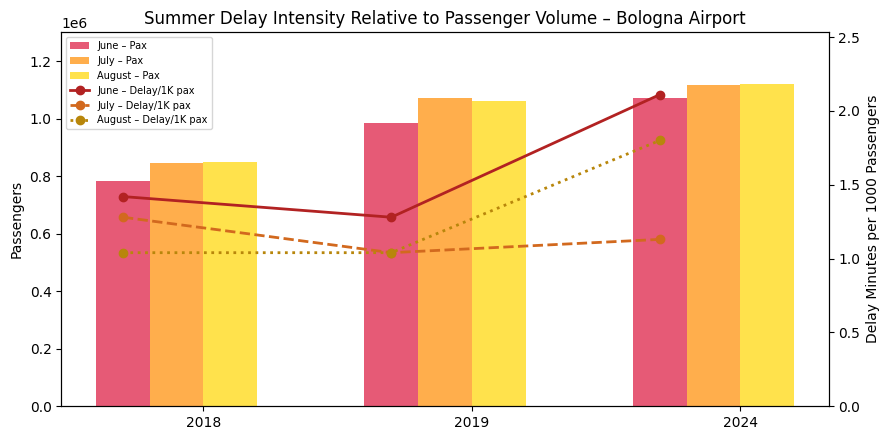

<Figure size 640x480 with 0 Axes>

In [48]:
# Now visualize!
summer_df = pd.read_csv("bologna_delay_passenger_merged.csv")


# plot bar for passengers, line for delay per 1000 pax
fig, ax1 = plt.subplots(figsize=(9,4.5))

colors = ['crimson', 'darkorange', 'gold']
line_colors = ['firebrick', 'chocolate', 'darkgoldenrod']


months = {6: 'June', 7: 'July', 8: 'August'}

# bar plot for passengers
for i, (month, color) in enumerate(zip([6, 7, 8], colors)):
    subset = summer_df[summer_df['MONTH_NUM'] == month]
    ax1.bar(
        [x + i*0.2 for x in range(len(subset))],
        subset['Monthly_Pax'],
        width=0.2,
        label=f'{months[month]} – Pax',
        alpha=0.7,
        color=color
    )


ax1.set_ylabel('Passengers')

years = sorted(summer_df['YEAR'].unique())
ax1.set_xticks([r + 0.3 for r in range(len(years))])
ax1.set_xticklabels([str(y) for y in years])

ax1.set_ylim(0, 1300000)

# second axis for delay per 1000 pax
ax2 = ax1.twinx()
for month, style, line_color in zip([6, 7, 8], ['solid', 'dashed', 'dotted'], line_colors):
    subset = summer_df[summer_df['MONTH_NUM'] == month]
    ax2.plot(
        range(len(subset)),
        subset['Delay_per_1000_pax'],
        label=f'{months[month]} – Delay/1K pax',
        linestyle=style,
        marker='o',
        linewidth=2,
        color=line_color
    )
    
ax2.set_ylabel('Delay Minutes per 1000 Passengers')
ax2.set_ylim(0, summer_df['Delay_per_1000_pax'].dropna().max() * 1.2)

# combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=7)

plt.title("Summer Delay Intensity Relative to Passenger Volume – Bologna Airport")
plt.tight_layout()
plt.show()

plt.savefig("filename.svg", format='svg', dpi=300, bbox_inches='tight')


## 7.1 Analytical Note: Summer Delay Intensity at Bologna Airport
This chart visualizes monthly passenger volumes alongside ATC delay intensity (delay minutes per 1,000 passengers) for June–August.

Key Findings:
* **June 2024** marks a critical stress point, with delay intensity more than double that of previous years.

* **July and August 2024** show better performance despite higher traffic, indicating **possible recovery mechanisms** or **operational responses** initiated after June.

* Overall, data suggests that **traffic growth is outpacing operational capacity**, especially in early summer months.

Operational Implications:

* Are ATC and ground operations appropriately resourced for seasonal ramp-up?

* Did Bologna implement specific mitigation measures between June and July 2024?

* Is delay intensity being used proactively as a KPI in airport performance dashboards?

>**This view raises technical considerations about scalability, resilience, and intra-seasonal responsiveness.**

## 7.2 Cleaning and Consolidating Slot Delay


In [49]:
# file paths (update and save in a different folder)
files = {
    2018: "atfm_slot_adherence_2018.csv",
    2019: "atfm_slot_adherence_2019.csv",
    2020: "atfm_slot_adherence_2020.csv",
    2024: "atfm_slot_adherence_2024.csv",
    2025: "atfm_slot_adherence_2025.csv"
}

# load files in a Dataframe dictionary
slot_dfs = {year: pd.read_csv(path) for year, path in files.items()}


In [50]:
# define summer months
summer_months = [6, 7, 8]

# create an empty list to hold the result
bologna_slot_summer = []

# apply filters to each year
for year, df in slot_dfs.items():
    filtered = df[(df["APT_ICAO"] == "LIPE") & (df["MONTH_NUM"].isin(summer_months))]
    if not filtered.empty:
        bologna_slot_summer.append(filtered)

# unify result in a single DataFrame
bologna_slot_summer_df = pd.concat(bologna_slot_summer, ignore_index=True)

# visualize first lines for confirmation
bologna_slot_summer_df.head()


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_DEP_REG_1,FLT_DEP_OUT_EARLY_1,FLT_DEP_IN_1,FLT_DEP_OUT_LATE_1
0,2018,6,JUN,2018-06-01,LIPE,Bologna,Italy,113,46,1,45,0
1,2018,6,JUN,2018-06-02,LIPE,Bologna,Italy,95,45,2,43,0
2,2018,6,JUN,2018-06-03,LIPE,Bologna,Italy,104,44,0,44,0
3,2018,6,JUN,2018-06-04,LIPE,Bologna,Italy,105,38,1,37,0
4,2018,6,JUN,2018-06-05,LIPE,Bologna,Italy,110,28,0,28,0


In [51]:
# Aggregate by YEAR and MONTH_NUM
slot_summary = (
    bologna_slot_summer_df
    .groupby(['YEAR', 'MONTH_NUM'], as_index=False)
    .agg({
        'FLT_DEP_1': 'sum',
        'FLT_DEP_OUT_LATE_1': 'sum'
    })
    .rename(columns={
        'FLT_DEP_1': 'Total_Slot_Flights',
        'FLT_DEP_OUT_LATE_1': 'Slot_Delayed_Flights'
    })
)

# preview the result
slot_summary


,YEAR,MONTH_NUM,Total_Slot_Flights,Slot_Delayed_Flights
0,2018,6,3279,2
1,2018,7,3422,5
2,2018,8,3347,1
3,2019,6,3486,6
4,2019,7,3676,4
5,2019,8,3461,4
6,2020,6,398,0
7,2020,7,1410,0
8,2020,8,1815,0
9,2024,6,4062,9


In [52]:
# load the bologna_delay_passenger_merged file
merged_path = "bologna_delay_passenger_merged.csv"
bologna_delay_passenger_merged = pd.read_csv(merged_path)

# merge with slot_summary on YEAR and MONTH_NUM
bologna_combined = pd.merge(
    bologna_delay_passenger_merged,
    slot_summary,
    on=['YEAR', 'MONTH_NUM'],
    how='left'  # Keep all rows from the delay_passenger dataset
)


# save the merged and enriched DataFrame to CSV
bologna_combined.to_csv("bologna_combined_with_slot_delays.csv", index=False)

bologna_combined.head()

,YEAR,MONTH_NUM,Flights_with_delay,Minutes_of_delay,Total_IFR_Movements,Avg_delay_per_delayed_flight,Avg_delay_per_total_flight,Monthly_Pax,Delay_per_1000_pax,Total_Slot_Flights,Slot_Delayed_Flights
0,2018,1,2628,1295.0,5255,0.492770,0.246432,NaN,NaN,NaN,NaN
1,2018,2,2397,1070.0,4798,0.446391,0.223010,NaN,NaN,NaN,NaN
2,2018,3,2823,1423.0,5639,0.504074,0.252350,NaN,NaN,NaN,NaN
3,2018,4,2953,1212.0,5920,0.410430,0.204730,NaN,NaN,NaN,NaN
4,2018,5,3074,1218.0,6149,0.396226,0.198081,3245094.0,0.38,NaN,NaN


In [53]:
# calculate Slot_Delay_per_1000_pax
bologna_combined['Slot_Delay_per_1000_pax'] = (
    bologna_combined['Slot_Delayed_Flights'] / bologna_combined['Monthly_Pax']
) * 1000

# round for readability
bologna_combined['Slot_Delay_per_1000_pax'] = bologna_combined['Slot_Delay_per_1000_pax'].round(2)

In [54]:
# load the uploaded file into a DataFrame
df = pd.read_csv("bologna_combined_with_slot_delays.csv")

# just checking if it's loaded properly
df.head()


,YEAR,MONTH_NUM,Flights_with_delay,Minutes_of_delay,Total_IFR_Movements,Avg_delay_per_delayed_flight,Avg_delay_per_total_flight,Monthly_Pax,Delay_per_1000_pax,Total_Slot_Flights,Slot_Delayed_Flights
0,2018,1,2628,1295.0,5255,0.492770,0.246432,NaN,NaN,NaN,NaN
1,2018,2,2397,1070.0,4798,0.446391,0.223010,NaN,NaN,NaN,NaN
2,2018,3,2823,1423.0,5639,0.504074,0.252350,NaN,NaN,NaN,NaN
3,2018,4,2953,1212.0,5920,0.410430,0.204730,NaN,NaN,NaN,NaN
4,2018,5,3074,1218.0,6149,0.396226,0.198081,3245094.0,0.38,NaN,NaN


In [55]:
# clean column names just in case
df.columns = df.columns.str.strip()

# create Slot_Delay_per_1000_pax if not already in columns
if "Slot_Delay_per_1000_pax" not in df.columns:
    df["Slot_Delay_per_1000_pax"] = (df["Slot_Delayed_Flights"] / df["Monthly_Pax"]) * 1000

# filter for summer months: June (6), July (7), August (8)
summer_months = [6, 7, 8]

# filter for years: 2018, 2019, 2024
target_years = [2018, 2019, 2024]

# filter the data
summer_data = df[(df["MONTH_NUM"].isin(summer_months)) & (df["YEAR"].isin(target_years))].copy()

# make sure 'Month' is string for plotting
summer_data["Month"] = summer_data["MONTH_NUM"].astype(str)

# sort for clean plotting
summer_data = summer_data.sort_values(by=["YEAR", "MONTH_NUM"])

# preview filtered data
summer_data[["YEAR", "Month", "Delay_per_1000_pax", "Slot_Delay_per_1000_pax"]]


,YEAR,Month,Delay_per_1000_pax,Slot_Delay_per_1000_pax
5,2018,6,1.42,0.002548
6,2018,7,1.28,0.005916
7,2018,8,1.04,0.001178
17,2019,6,1.28,0.006099
18,2019,7,1.04,0.003735
19,2019,8,1.04,0.003772
29,2024,6,2.11,0.008401
30,2024,7,1.13,0.006271
31,2024,8,1.80,0.003571


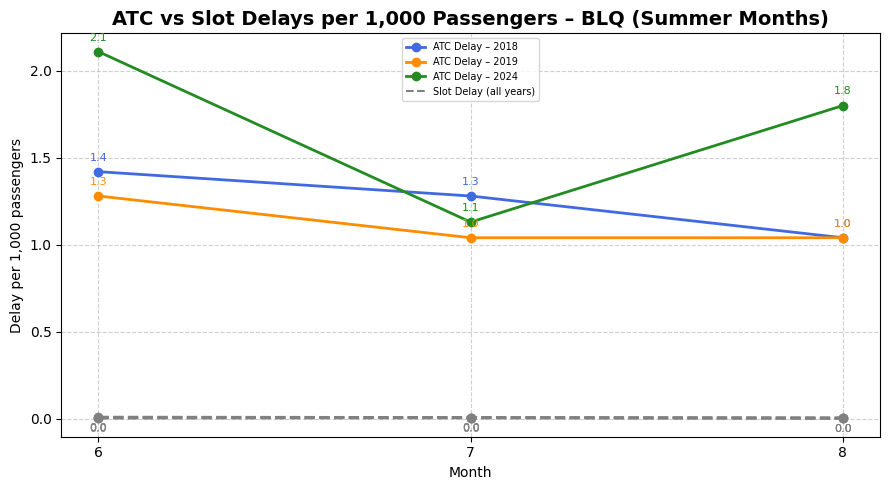

In [56]:
# Set up the plot: slot delays vs ATC delays
fig, ax = plt.subplots(figsize=(9,5))

# assign colors to each year for ATC delays
atc_colors = {
    2018: "royalblue",
    2019: "darkorange",
    2024: "forestgreen"
}

# plot lines for each year
for year in [2018, 2019, 2024]:
    year_df = summer_data[summer_data["YEAR"] == year]

    # ATC delay line
    ax.plot(year_df["Month"], year_df["Delay_per_1000_pax"],
            marker='o', linewidth=2, color=atc_colors[year], label=f"ATC Delay – {year}")

    # Slot delay line (gray dashed for all)
    ax.plot(year_df["Month"], year_df["Slot_Delay_per_1000_pax"],
            marker='o', linewidth=2, color="gray", linestyle='--')

    # annotate ATC delays
    for i in range(len(year_df)):
        ax.annotate(f"{year_df['Delay_per_1000_pax'].iloc[i]:.1f}",
                    (year_df["Month"].iloc[i], year_df["Delay_per_1000_pax"].iloc[i]),
                    textcoords="offset points", xytext=(0, 8), ha='center', fontsize=8,
                    color=atc_colors[year])

        # annotate Slot delays
        ax.annotate(f"{year_df['Slot_Delay_per_1000_pax'].iloc[i]:.1f}",
                    (year_df["Month"].iloc[i], year_df["Slot_Delay_per_1000_pax"].iloc[i]),
                    textcoords="offset points", xytext=(0, -10), ha='center', fontsize=8,
                    color="gray")

# add legend entry for the slot line
ax.plot([], [], color='gray', linestyle='--', label="Slot Delay (all years)")

# title and labels
ax.set_title("ATC vs Slot Delays per 1,000 Passengers – BLQ (Summer Months)", fontsize=14, weight='bold')
ax.set_ylabel("Delay per 1,000 passengers")
ax.set_xlabel("Month")
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc="upper center", fontsize=7)

# layout and show
plt.tight_layout()
plt.show()


## 7.3 Final Comments on Delay Patterns (Summer 2018–2024)

This multi-line chart provides a comparative view of ATC vs. Slot delays per 1,000 passengers during the peak summer months (June, July, August) for the years 2018, 2019, and 2024.

Key insights:

* **ATC delays** show seasonal peaks and a clear worsening trend, particularly in June 2024, indicating stress on capacity or staffing early in the peak period.

* In contrast, *slot delays are virtually flat across all years*, remaining consistently below *0.02 per 1,000 passengers*. This confirms their *negligible contribution to total delay* at Bologna Airport.

* The gap between ATC and slot delays is not only large but *increasing over time*, suggesting that most of the operational strain is related to *air traffic control* and *airport-side resources*, not to slot allocation itself.

These findings underscore a structural imbalance between traffic growth and ATC capacity, especially at the start of the summer season. *Slot adherence is not the problem* — rather, Bologna's delay challenges appear concentrated in local or en-route ATC flow management.

# 8 CO₂ Emissions and Environmental Strategy

Although data on CO₂ emissions specific to Bologna Airport **does exist**, it is currently available only through institutional articles and press releases — not in a structured, year-by-year dataset suitable for quantitative analysis. Extracting and consolidating this information would require extensive manual research and web scraping across heterogeneous sources, which falls outside the scope of this notebook.

However, Bologna Airport's environmental positioning is significant:

>Bologna Guglielmo Marconi Airport has achieved the “Level 4+ Transition” accreditation within the international Airport Carbon Accreditation (ACA) program, promoted by ACI Europe. This certification recognizes airport operators who commit to carbon neutrality for emissions under their direct control, through energy efficiency programs and the use of renewable energy sources.

This is a **high-level certification** that only a limited number of airports worldwide have achieved:

* As of mid-2023, over 500 airports globally are enrolled in the ACA program.

* However, only a **small subset** have reached **Level 4+ Transition**, reflecting both high ambition and strict compliance requirements.

To qualify for Level 4+, airports must:

* Align their carbon management strategies with the Paris Agreement and set absolute emissions reduction targets;

* Offset all residual Scope 1 and Scope 2 emissions (those under direct airport control), including emissions from staff business travel;

* Demonstrate a plan for engaging third parties (e.g. airlines, handlers) in addressing Scope 3 emissions, even though these are not yet neutralized.

>Bologna Airport has publicly committed to several environmental initiatives — including the creation of a forested buffer zone north of the runway and the upgrade of lighting and climate control systems to improve energy efficiency.

Limitations

* The **certification scope excludes aircraft emissions**, which represent the majority of airport-related CO₂ output and remain under airline control.

* Scope 3 emissions — such as those from ground handlers and passenger access — are acknowledged but not offset.

* No longitudinal public datasets currently exist to track Bologna’s year-over-year progress under the program.

>This section situates Bologna’s environmental credentials within the global framework of airport sustainability, while clearly acknowledging the limitations of the available data for in-depth quantitative analysis.

In [57]:
# load all CO2 emission files for 2019, 2024, 2025
df_2017 = pd.read_csv("co2_emmissions_by_state_2017.csv")
df_2018 = pd.read_csv("co2_emmissions_by_state_2018.csv")
df_2019 = pd.read_csv("co2_emmissions_by_state_2019.csv")
df_2020 = pd.read_csv("co2_emmissions_by_state_2020.csv")
df_2021 = pd.read_csv("co2_emmissions_by_state_2021.csv")
df_2022 = pd.read_csv("co2_emmissions_by_state_2022.csv")
df_2023 = pd.read_csv("co2_emmissions_by_state_2023.csv")
df_2024 = pd.read_csv("co2_emmissions_by_state_2024.csv")
df_2025 = pd.read_csv("co2_emmissions_by_state_2025.csv")

# add year column to each
df_2017["Year"] = 2017
df_2018["Year"] = 2018
df_2019["Year"] = 2019
df_2020["Year"] = 2020
df_2021["Year"] = 2021
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024
df_2025["Year"] = 2025

# combine all into a single dataframe
co2_all = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)

# filter only Italy data from combined CO₂ dataset
co2_italy = co2_all[co2_all["STATE_NAME"] == "ITALY"].copy()

# summarize total CO₂ per year
co2_italy_summary = co2_italy.groupby("Year")["CO2_QTY_TONNES"].sum().reset_index()
co2_italy_summary["CO2_QTY_TONNES"] = co2_italy_summary["CO2_QTY_TONNES"].round(2)

# show summary
co2_italy_summary



,Year,CO2_QTY_TONNES
0,2017,13502111.30
1,2018,14339144.88
2,2019,15106921.48
3,2020,5317375.95
4,2021,6811548.84
5,2022,11431253.53
6,2023,13628501.78
7,2024,15695762.07
8,2025,1041432.58


## 8.1 First Observations

* CO₂ emissions in Italy* from Eurocontrol show a clear rebound:

* From *13.5 million tonnes in 2017* to a *record 15.7 million tonnes in 2024*.

* The *pandemic dip in 2020* (5.3 million tonnes) stands out as an extraordinary drop.


This suggests a *marginal improvement in CO₂ efficiency per passenger*, possibly due to:

* Higher load factors

* Route optimization

* Fleet renewal



## 8.2 Aviation-Specific CO₂ Emissions per Flight in Italy (2017–2024)

In [58]:
# list of files uploaded for Eurocontrol data
files = {
    2017: "airport_traffic_2017.csv",
    2018: "airport_traffic_2018.csv",
    2019: "airport_traffic_2019.csv",
    2020: "airport_traffic_2020.csv",
    2021: "airport_traffic_2021.csv",
    2022: "airport_traffic_2022.csv",
    2023: "airport_traffic_2023.csv",
    2024: "airport_traffic_2024.csv"
}

# initialize a list to store flight data summaries
flight_data = []

# loop through the files to load and extract "FLT_TOT_1" for each year
for year, file_path in files.items():
    df = pd.read_csv(file_path)
    
    # Check the first few rows to understand the structure of the dataset
    total_flights = df[df["APT_ICAO"] == "LIPE"]["FLT_TOT_1"].sum()
    
    # Add the data to the summary list
    flight_data.append({"Year": year, "Total_Flights": total_flights})

# convert the flight data list into a DataFrame
total_flights_italy_df = pd.DataFrame(flight_data)
total_flights_italy_df

,Year,Total_Flights
0,2017,71260
1,2018,71414
2,2019,77090
3,2020,29897
4,2021,42214
5,2022,70667
6,2023,78443
7,2024,82897


In [59]:
# load the newly uploaded CO₂ data for Italy (annual emissions)
co2_italy_total = pd.read_csv("annual-co2-emissions-Italia.csv")

# display the first few rows to inspect the structure
co2_italy_total.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Italy,ITA,2016,358144350
1,Italy,ITA,2017,352678620
2,Italy,ITA,2018,349062140
3,Italy,ITA,2019,339633540
4,Italy,ITA,2020,302602430


In [60]:
# filter for Italy only and select relevant columns (Year, Annual CO₂ emissions)
co2_italy_total = co2_italy_total[["Year", "Annual CO₂ emissions"]]

# merge the CO₂ emissions data with the total flights data by year
final_data = pd.merge(total_flights_italy_df, co2_italy_total, on="Year", how="left")
final_data

,Year,Total_Flights,Annual CO₂ emissions
0,2017,71260,352678620.0
1,2018,71414,349062140.0
2,2019,77090,339633540.0
3,2020,29897,302602430.0
4,2021,42214,335977820.0
5,2022,70667,340672300.0
6,2023,78443,313460640.0
7,2024,82897,NaN


In [61]:
# co2 TA emmissions
co2_files = {
    2017: "co2_emmissions_by_state_2017.csv",
    2018: "co2_emmissions_by_state_2018.csv",
    2019: "co2_emmissions_by_state_2019.csv",
    2020: "co2_emmissions_by_state_2020.csv",
    2021: "co2_emmissions_by_state_2021.csv",
    2022: "co2_emmissions_by_state_2022.csv",
    2023: "co2_emmissions_by_state_2023.csv",
    2024: "co2_emmissions_by_state_2024.csv",
    }

co2_annual_data = []

for year, path in co2_files.items():
    df = pd.read_csv(path)
    df = df[df['STATE_NAME'].str.lower() == 'italy']  # filtra solo Italy
    total_tons = df['CO2_QTY_TONNES'].sum()
    co2_annual_data.append({
        "Year": year,
        "Italy_TA_CO2_Tons": total_tons
    })

df_co2_annual = pd.DataFrame(co2_annual_data)
print(df_co2_annual)


   Year  Italy_TA_CO2_Tons
0  2017       1.350211e+07
1  2018       1.433914e+07
2  2019       1.510692e+07
3  2020       5.317376e+06
4  2021       6.811549e+06
5  2022       1.143125e+07
6  2023       1.362850e+07
7  2024       1.569576e+07


In [62]:
# merge everything into one dataframe on Year
merged_df = pd.merge(final_data, df_co2_annual, on="Year", how="left")

# check the result
print(merged_df)


   Year  Total_Flights  Annual CO₂ emissions  Italy_TA_CO2_Tons
0  2017          71260           352678620.0       1.350211e+07
1  2018          71414           349062140.0       1.433914e+07
2  2019          77090           339633540.0       1.510692e+07
3  2020          29897           302602430.0       5.317376e+06
4  2021          42214           335977820.0       6.811549e+06
5  2022          70667           340672300.0       1.143125e+07
6  2023          78443           313460640.0       1.362850e+07
7  2024          82897                   NaN       1.569576e+07


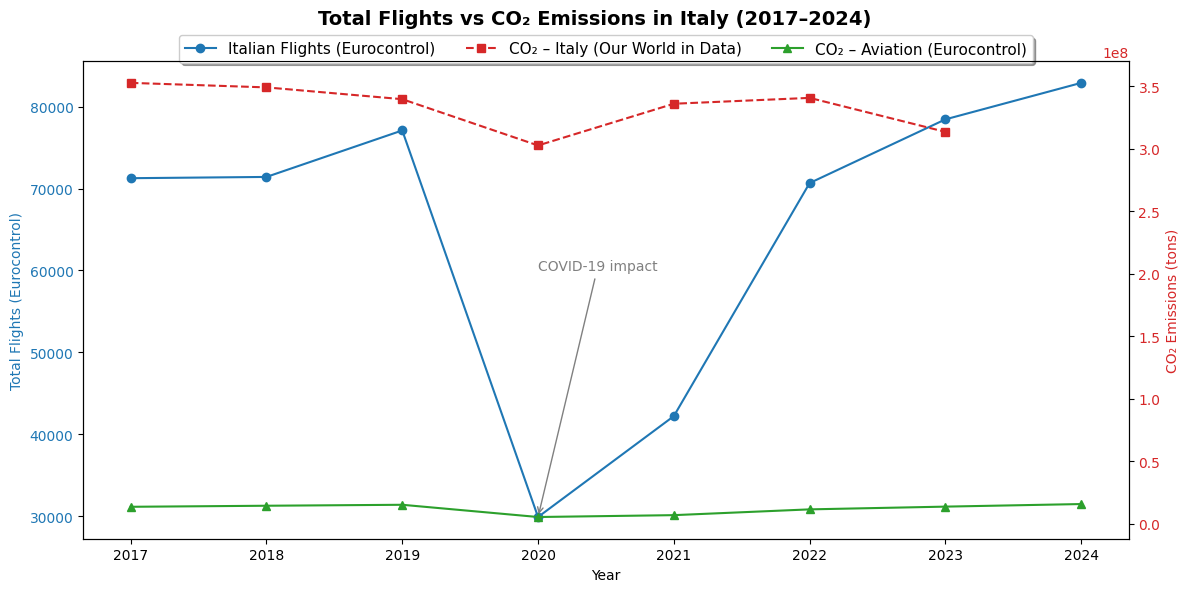

In [63]:
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Left Y-Axis: Total Flights ---
color1 = "tab:blue"
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Flights (Eurocontrol)", color=color1)
ax1.plot(merged_df["Year"], merged_df["Total_Flights"], marker='o', color=color1, label="Italian Flights (Eurocontrol)")
ax1.tick_params(axis='y', labelcolor=color1)

# --- Right Y-Axis: CO₂ Emissions ---
ax2 = ax1.twinx()  # Secondary y-axis

# Total CO₂ emissions (Our World in Data)
color2 = "tab:red"
ax2.set_ylabel("CO₂ Emissions (tons)", color=color2)
ax2.plot(merged_df["Year"], merged_df["Annual CO₂ emissions"], marker='s', linestyle='--',
         color=color2, label="CO₂ – Italy (Our World in Data)")

# Aviation-specific CO₂ (Eurocontrol)
color3 = "tab:green"
ax2.plot(merged_df["Year"], merged_df["Italy_TA_CO2_Tons"], marker='^', linestyle='-',
         color=color3, label="CO₂ – Aviation (Eurocontrol)")
ax2.tick_params(axis='y', labelcolor=color2)

# --- Title & Legends ---
fig.suptitle("Total Flights vs CO₂ Emissions in Italy (2017–2024)", fontsize=14, weight='bold')
fig.tight_layout()

# Combine both legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=3, fancybox=True, shadow=True, fontsize=11)
               
ax1.annotate("COVID-19 impact", xy=(2020, merged_df.loc[merged_df['Year'] == 2020, 'Total_Flights'].values[0]),
xytext=(2020, 60000), textcoords="data",
arrowprops=dict(arrowstyle="->", color="gray"),
fontsize=10, color="gray")

# Show the plot
plt.show()



>From 2017 to 2024, Italy's air traffic showed a steady post-COVID recovery. While total CO₂ emissions (Our World in Data) followed a modest decrease overall, aviation-specific CO₂ emissions (Eurocontrol) have nearly returned to pre-pandemic levels — with a visible increase in 2024. Interestingly, despite growth in the number of flights, aviation’s share of national emissions remains proportionally lower than in 2019, suggesting possible efficiency gains or modal shifts.

In [64]:
# calculating CO2 emissions per flight
merged_df["CO2_per_flight"] = merged_df["Italy_TA_CO2_Tons"] / merged_df["Total_Flights"]


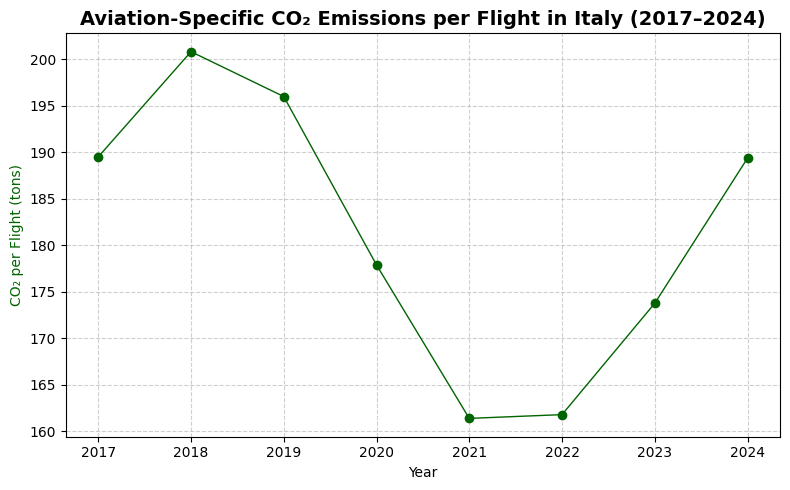

In [65]:
# inserting data
data = {
    "Year": [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Total_Flights": [71260, 71414, 77090, 29897, 42214, 70667, 78443, 82897],
    "Annual_CO2_emissions": [352678620.0, 349062140.0, 339633540.0, 302602430.0, 
                              335977820.0, 340672300.0, 313460640.0, None],
    "Italy_TA_CO2_Tons": [1.350211e+07, 1.433914e+07, 1.510692e+07, 5.317376e+06, 
                          6.811549e+06, 1.143125e+07, 1.362850e+07, 1.569576e+07]
}

merged_df = pd.DataFrame(data)

# Calculate CO2 per flight (aviation-specific)
merged_df["CO2_per_flight"] = merged_df["Italy_TA_CO2_Tons"] / merged_df["Total_Flights"]

# Plot CO2 per flight over time
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(merged_df["Year"], merged_df["CO2_per_flight"], marker='o', color='darkgreen', linewidth=1)
ax.set_title("Aviation-Specific CO₂ Emissions per Flight in Italy (2017–2024)", fontsize=14, weight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("CO₂ per Flight (tons)", color='darkgreen')
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

What this plot shows:

* Pre-pandemic years (2017–2019): Higher emissions per flight — possibly due to fuller schedules, older fleets, or less efficient operations.

* 2020–2021: Emissions per flight dropped significantly — likely a result of reduced operations and improved traffic efficiency.

* 2022–2024: A steady rise again, suggesting traffic normalization, but still not quite reaching 2019 levels in intensity.

### 8.2.1 Reflections

When I began exploring the environmental impact of air transport, I assumed aviation would be among the primary contributors to national CO₂ emissions.
But the data told a more nuanced story: in Italy, aviation accounted for only about *4–5%* of total CO₂ emissions in recent years.

This was surprising — and thought-provoking.

* **Air traffic is still one of the fastest-growing sources** of emissions, especially post-COVID.

* **Unlike other sectors, aviation remains difficult to decarbonize** — electric or hydrogen-powered flights are not yet viable at scale.

* **Global equity matters**: most of the world's population has never flown. Those who do — often repeatedly — are part of a smaller, more privileged group.

**This insight reminded me that data doesn't just inform — it can shift our perspective.**





## 8.3 Load factor

Si calcola dividendo il numero di passeggeri trasportati per i chilometri percorsi (RPK) per il numero di posti offerti per i chilometri percorsi (ASK). 

| Year | Italy - Total Passengerrs | Italy - National Load Factor  | Italy - CO2 Emissions |
|------|---------------------------|-------------------------------|-----------------------|
| 2019 | 193.102.146               | 83,43%                        | 1.510692e+07          |
| 2020 | 52.924.432                | 65,61%                        | 5.317376e+06          |
| 2021 | 80.671.397                | 54,5%                         | 6.811549e+06          | 
| 2022 | 164.641.552               | 80.1%                         | 1.143125e+07          |
| 2023 | 197.194.004               | 82.0%                         | 1.362850e+07          |
| 2024 | 219.078.386               | 83,5%                         | 1.569576e+07          |

N.B.: 2021: Load fator data available just for ITA Airways

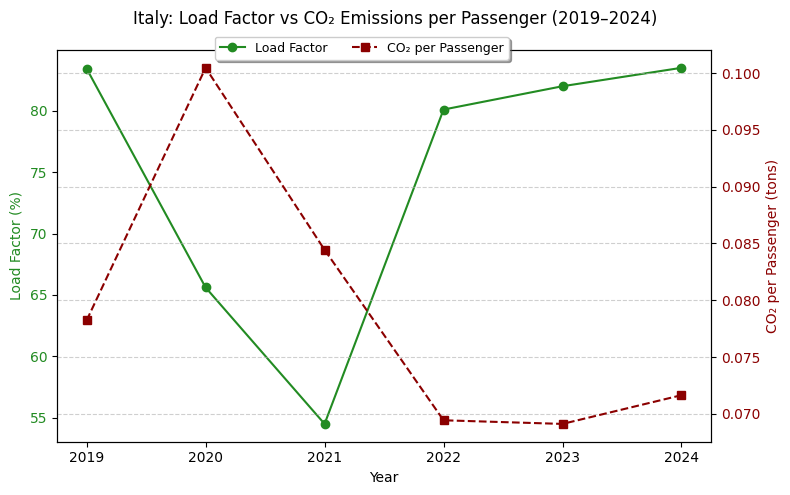

In [66]:
# Step 1: Create the DataFrame with total passengers added
data = {
    'Year': [2019, 2020, 2021, 2022, 2023, 2024],
    'Italy_passengers': [193102146, 52924432, 80671397, 164641552, 197194004, 219078386],
    'Italy_load_factor': [83.43, 65.61, 54.5, 80.1, 82.0, 83.5],
    'Italian_emissions': [1.510692e+07, 5.317376e+06, 6.811549e+06, 1.143125e+07, 1.362850e+07, 1.569576e+07]
}

df = pd.DataFrame(data)

# Step 2: Compute emissions per passenger (tons/passenger)
df['Emissions_per_passenger'] = df['Italian_emissions'] / df['Italy_passengers']
df['Emissions_per_passenger'] = df['Emissions_per_passenger'].round(5)

# Step 3: Plot with dual y-axis (load factor and emissions per passenger)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Load factor
color1 = 'forestgreen'
ax1.set_xlabel('Year')
ax1.set_ylabel('Load Factor (%)', color=color1)
ax1.plot(df['Year'], df['Italy_load_factor'], marker='o', color=color1, label='Load Factor')
ax1.tick_params(axis='y', labelcolor=color1)

# Secondary y-axis for emissions per passenger
ax2 = ax1.twinx()
color2 = 'darkred'
ax2.set_ylabel('CO₂ per Passenger (tons)', color=color2)
ax2.plot(df['Year'], df['Emissions_per_passenger'], marker='s', linestyle='--', color=color2, label='CO₂ per Passenger')
ax2.tick_params(axis='y', labelcolor=color2)

# Title and legend
fig.suptitle('Italy: Load Factor vs CO₂ Emissions per Passenger (2019–2024)', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.grid(True, linestyle='--', alpha=0.6)

# Combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, bbox_to_anchor=(0.7, 1.05),
          ncol=2, fancybox=True, shadow=True, fontsize=9)


plt.show()


### 8.3.1 Load Factor vs CO₂ Emissions per Passenger (2019–2024)

This chart explores the relationship between Italy's national **airline load factor** and **CO₂ emissions per passenger** from 2019 to 2024.

**Key Insights:**
- In **2020–2021**, the **load factor dropped sharply** due to the COVID-19 pandemic, while **CO₂ emissions per passenger increased**, indicating reduced efficiency: planes were flying with fewer people on board.
- As the **load factor recovered** in **2022–2024**, the emissions per passenger **decreased**, suggesting better aircraft utilization and operational efficiency.
- Despite growing **passenger volumes**, emissions per passenger remained stable in the last two years — likely a result of improved fleet efficiency or route management.

This confirms the intuitive hypothesis: **higher load factors** can contribute to **lower emissions per passenger**, making air travel more efficient — even when total traffic increases.


# 9 Final Considerations

This project examined the evolution of air traffic, delay trends, and aviation-related CO₂ emissions in Italy from 2017 through early 2025, with a focus on Bologna Airport as a case study. Data sources included Eurocontrol, Assaeroporti, and Our World in Data.

Several key observations emerged:

- **Air traffic recovery** post-2020 has been steady, with total IFR movements and passenger volumes exceeding pre-pandemic levels by 2024.
- **Pre-departure ATC delays**, analyzed exclusively for Bologna Airport, have intensified significantly, particularly in 2024, pointing to systemic strain in local airside operations. In contrast, **slot-related delays** remain negligible.
- **CO₂ emissions from aviation**, assessed at the **national level**, have increased in absolute terms but still account for only 4–5% of Italy’s total emissions. The perception of air travel’s environmental footprint often exceeds its actual contribution.
- **Efficiency matters**: by comparing Italy’s national load factor and total CO₂ emissions, we observed a consistent relationship between aircraft utilization and emissions per passenger. In years with higher load factors (2022–2024), emissions per passenger decreased — even as total traffic volumes rose — indicating improved operational efficiency.

This confirms that while traffic growth poses sustainability challenges, **optimizing load factor and network design** can help mitigate environmental impact without constraining mobility.

---

## 9.1 Methodological Note

This notebook is presented as a technical case study combining publicly available datasets with domain-specific expertise in airport operations.  
It distinguishes between two scales of analysis:
- **Delays and operational bottlenecks** are examined for **Bologna Airport** only (ICAO: LIPE).
- **CO₂ emissions and load factor data** reflect **national-level trends** in Italian aviation.

The project aims to support informed dialogue on **performance bottlenecks**, **capacity planning**, and **climate-aware infrastructure design**.

All results reflect the status of the air transport sector as of Q1 2025 and may evolve as updated information becomes available.


## 9.2 Further Exploration

This analysis focused on Bologna Airport and national-level indicators. A natural extension of the project would include:

- **Comparative analysis across multiple Italian airports**, using the same methodology to highlight regional disparities or best practices.
- **Inclusion of weather patterns** or seasonal effects to better understand the external factors influencing delay peaks.
- **Interactive dashboard deployment** using tools such as Dash or Streamlit, enabling dynamic exploration of key performance indicators by year, month, or metric.

In addition, automated data pipelines — via API connections or web scraping from official public sources — could support a **scalable and continuously updated version** of the dashboard, facilitating operational monitoring and strategic decision-making.


# 10 References

[Eurocontrol](https://ansperformance.eu/data/)

[Assaeroporti](https://assaeroporti.com/dati-di-traffico/)

[ACI Europe – Airport Carbon Accreditation Program](https://www.airportcarbonaccreditation.org)

[Level 4+ Transition – Accreditation Criteria](https://www.airportcarbonaccreditation.org/about/7-levels-of-accreditation/transition)

[ACI Europe Announcement: Over 500 Accredited Airports Worldwide](https://www.airportcarbonaccreditation.org/global-carbon-standard-for-airports-passes-the-500-milestone)

[Assaeroporti – Sustainability Section (in Italian)](https://assaeroporti.com/sostenibilita/)

[Bologna Airport Official Website](https://www.bologna-airport.it/en/)

[Our World in Data](https://ourworldindata.org/grapher/annual-co2-emissions-per-country?time=2016..latest&country=~ITA#explore-the-data)

[Autorità di Regolazione dei Trasporti](https://www.autorita-trasporti.it/wp-content/uploads/2025/02/AIR-delibera-n.-28_2025_signed.pdf)

[DATI DI TRAFFICO AEROPORTUALE CONSUNTIVO 2020](https://data-upload.assaeroporti.com/download-report/2020/12#:~:text=stesso%20mese%20del%202019:%20489.381%2C%20mentre%20i,lo%20scalo%20aereo%20palermitano%20ha%20invece%20visto)

[Business Mobility TRAVEL](https://www.businessmobility.travel/iata-il-trasporto-aereo-globale-chiude-un-2024-da-record/22089/)